0.0131211


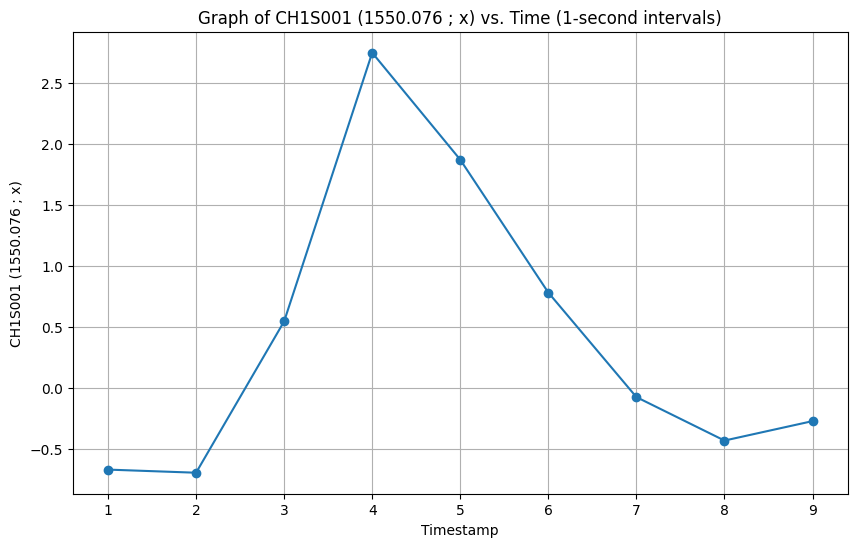

Area under the curve: 4.450986070781667


In [26]:
import pandas as pd

# Load your original data
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\S1_FVC.txt", sep='\t')

# Convert the "UTC Date" and "UTC Time" columns to a Timestamp column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Create a new dataframe with the average of every 1000 samples
window_size = 1000
new_df = df.groupby(df.index // window_size).agg({
    "Timestamp": "first",
    "CH1S001 (1550.076 ; x)": "mean"
})

# Create a "seconds" column in the new dataframe
new_df["seconds"] = range(1, len(new_df) + 1)

# Normalize your data
mean = new_df['CH1S001 (1550.076 ; x)'].max()
print(mean)
new_df['CH1S001 (1550.076 ; x)'] = new_df['CH1S001 (1550.076 ; x)'] / mean
new_df["CH1S001 (1550.076 ; x)"] = new_df["CH1S001 (1550.076 ; x)"] +1.75
# new_df["CH1S001 (1550.076 ; x)"] = new_df[new_df["CH1S001 (1550.076 ; x)"]>0]
# new_df = new_df[new_df["CH1S001 (1550.076 ; x)"] > 0]
# Plot the new dataframe
import matplotlib.pyplot as plt

x = new_df["seconds"]
y = new_df["CH1S001 (1550.076 ; x)"] 

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Time (1-second intervals)")
plt.grid(True)
plt.show()

# Calculate the area under the curve
from scipy.integrate import simps

area = simps(y, x)

print(f"Area under the curve: {area}")


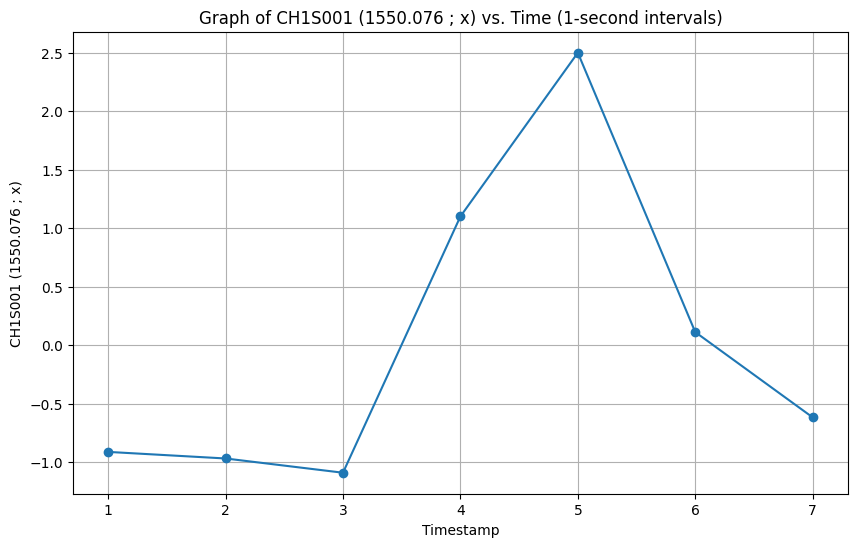

Area under the curve: 0.7591002256325472


In [1]:
import pandas as pd

# Load your original data
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\BRAGG_METER\hbm_11_08_23\G1_FVC.txt", sep='\t')

# Convert the "UTC Date" and "UTC Time" columns to a Timestamp column
df["Timestamp"] = pd.to_datetime(df["UTC Date"] + " " + df["UTC Time"])

# Create a new dataframe with the average of every 1000 samples
window_size = 1000
new_df = df.groupby(df.index // window_size).agg({
    "Timestamp": "first",
    "CH1S001 (1550.076 ; x)": "mean"
})

# Create a "seconds" column in the new dataframe
new_df["seconds"] = range(1, len(new_df) + 1)

# Normalize your data
mean = new_df['CH1S001 (1550.076 ; x)'].max()
new_df['CH1S001 (1550.076 ; x)'] = new_df['CH1S001 (1550.076 ; x)'] / mean
new_df["CH1S001 (1550.076 ; x)"] = new_df["CH1S001 (1550.076 ; x)"] + 1.5
# new_df["CH1S001 (1550.076 ; x)"] = new_df[new_df["CH1S001 (1550.076 ; x)"]>0]
# new_df = new_df[new_df["CH1S001 (1550.076 ; x)"] > 0]
# Plot the new dataframe
import matplotlib.pyplot as plt

x = new_df["seconds"]
y = new_df["CH1S001 (1550.076 ; x)"] 

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.xlabel("Timestamp")
plt.ylabel("CH1S001 (1550.076 ; x)")
plt.title("Graph of CH1S001 (1550.076 ; x) vs. Time (1-second intervals)")
plt.grid(True)
plt.show()

# Calculate the area under the curve
from scipy.integrate import simps

area = simps(y, x)

print(f"Area under the curve: {area}")


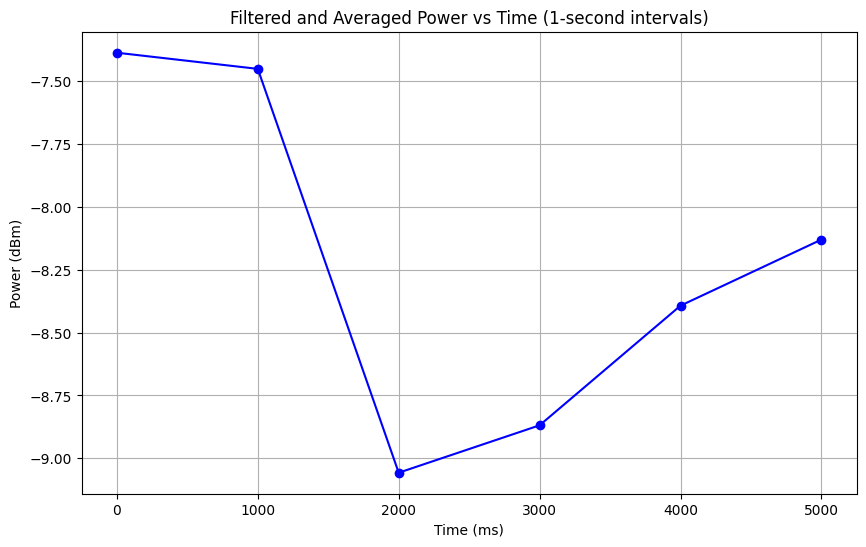

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import gaussian, convolve

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\S1_FVC.csv")

# Apply Gaussian filter to the PowerdBm (dBm) column
window = gaussian(1000, std=100)  # Adjust the window size and standard deviation as needed
filtered_power_dBm = convolve(df['PowerdBm (dBm)'], window / window.sum(), mode='same')

# Calculate the total time range in milliseconds
total_time_ms = len(df) * 3  # Assuming 3 ms per sample

# Create a new DataFrame with Time (ms) as 1-second intervals and the filtered PowerdBm values
time_ms_interval = 1000  # 1 second
new_time_ms = list(range(0, total_time_ms, time_ms_interval))
new_power_dBm = []

# Calculate the average value for each 1-second interval
for t in new_time_ms:
    start_index = t // 3
    end_index = (t + 1000) // 3
    average_value = df['PowerdBm (dBm)'][start_index:end_index].mean()
    new_power_dBm.append(average_value)

# Create a new DataFrame with the new Time (ms) and averaged PowerdBm values
new_df = pd.DataFrame({'Time (ms)': new_time_ms, 'PowerdBm (dBm)': new_power_dBm})

# Create the plot for the new dataset
plt.figure(figsize=(10, 6))
plt.plot(new_df['Time (ms)'], new_df['PowerdBm (dBm)'], marker='o', linestyle='-', color='b')
plt.title('Filtered and Averaged Power vs Time (1-second intervals)')
plt.xlabel('Time (ms)')
plt.ylabel('Power (dBm)')
plt.grid(True)

# Show the plot
plt.show()


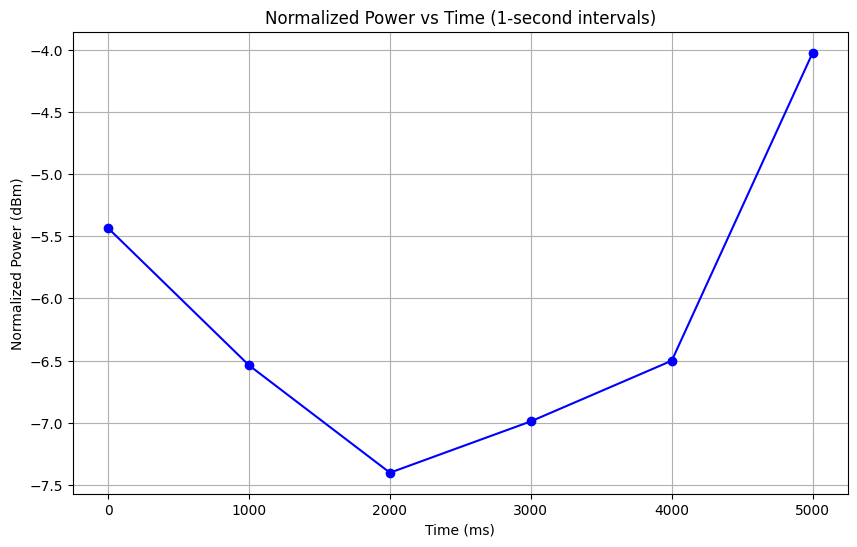

Area under the curve: -32457.88394318774


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import gaussian, convolve
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\V1_FVC.csv")

# Apply Gaussian filter to the PowerdBm (dBm) column
window = gaussian(1000, std=100)  # Adjust the window size and standard deviation as needed
filtered_power_dBm = convolve(df['PowerdBm (dBm)'], window / window.sum(), mode='same')

# Normalize the filtered PowerdBm values
scaler = StandardScaler()
normalized_power_dBm = filtered_power_dBm
# scaler.fit_transform(filtered_power_dBm.reshape(-1, 1))

# Calculate the total time range in milliseconds
total_time_ms = len(df) * 3  # Assuming 3 ms per sample

# Create a new DataFrame with Time (ms) as 1-second intervals and the normalized PowerdBm values
time_ms_interval = 1000  # 1 second
new_time_ms = list(range(0, total_time_ms, time_ms_interval))
new_power_dBm = []

# Calculate the average value for each 1-second interval
for t in new_time_ms:
    start_index = t // 3
    end_index = (t + 1000) // 3
    average_value = normalized_power_dBm[start_index:end_index].mean()
    new_power_dBm.append(average_value)

# Create a new DataFrame with the new Time (ms) and averaged normalized PowerdBm values
new_df = pd.DataFrame({'Time (ms)': new_time_ms, 'Normalized PowerdBm': new_power_dBm})

# Create the plot for the new dataset
plt.figure(figsize=(10, 6))
plt.plot(new_df['Time (ms)'], new_df['Normalized PowerdBm']+1, marker='o', linestyle='-', color='b')
plt.title('Normalized Power vs Time (1-second intervals)')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Power (dBm)')
plt.grid(True)

# Show the plot
plt.show()
area_under_curve = simps(new_df['Normalized PowerdBm'] + 1, dx=1000)  # dx is the time interval in milliseconds (1 second)

print("Area under the curve:", area_under_curve)


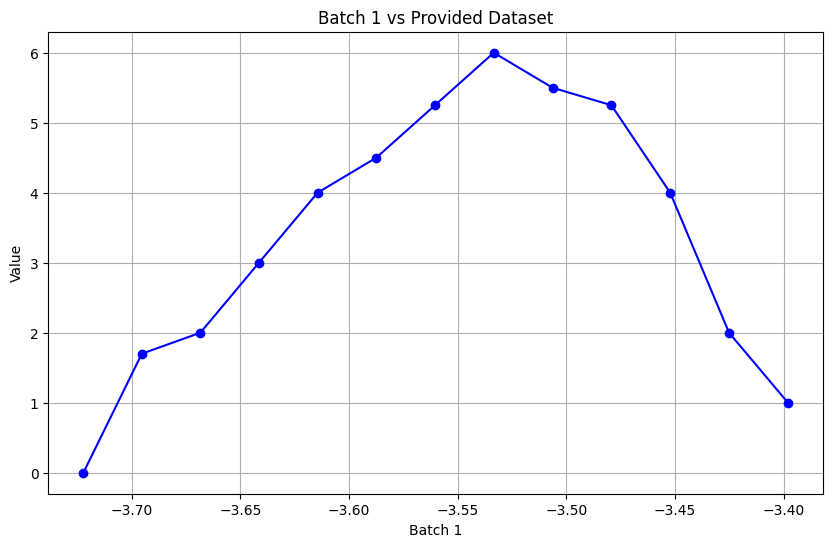

In [19]:
import pandas as pd
import numpy as np
from scipy.signal import gaussian, convolve
import matplotlib.pyplot as plt

# Load the initial dataset
df_initial = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\G1_FVC.csv")

# Load the provided new dataset
data_new = {
    'Seconds': [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3],
    'Value': [1, 2, 4, 5.25, 5.5, 6, 5.25, 4.5, 4, 3, 2, 1.7, 0]
}
df_new = pd.DataFrame(data_new)

# Apply Gaussian filter to the initial dataset
window = gaussian(1000, std=100)  # Adjust the window size and standard deviation as needed
filtered_power_dBm = convolve(df_initial['PowerdBm (dBm)'], window / window.sum(), mode='same')

# Calculate the correlation between the filtered initial dataset and each set of data points from the new dataset
correlations = []
for i in range(len(df_new)):
    new_data = df_new['Value'].values
    initial_data = filtered_power_dBm[i:i+len(new_data)]
    correlation = np.corrcoef(new_data, initial_data)[0, 1]
    correlations.append(correlation)

# Find the batch with maximum correlation
max_corr_index = np.argmax(correlations)
max_correlation = correlations[max_corr_index]
selected_batch = filtered_power_dBm[max_corr_index:max_corr_index + len(df_new)]

# Save the selected batch
selected_batch_df = pd.DataFrame({'Time (ms)': df_initial['Time (ms)'][max_corr_index:max_corr_index + len(df_new)], 'PowerdBm (dBm)': selected_batch})
selected_batch_df.to_csv('selected_batch.csv', index=False)

# Plot the graph with x-axis representing Batch 1 and y-axis representing the provided dataset
plt.figure(figsize=(10, 6))
plt.plot(selected_batch_df['PowerdBm (dBm)'], df_new['Value'], marker='o', linestyle='-', color='b')
plt.title('Batch 1 vs Provided Dataset')
plt.xlabel('Batch 1')
plt.ylabel('Value')
plt.grid(True)

# Show the plot
plt.show()


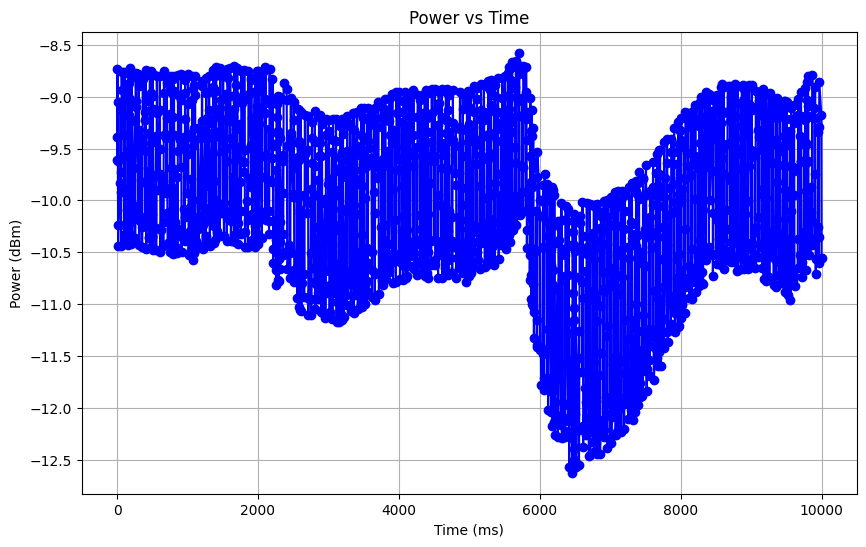

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\KA_FVC.csv")

# Extract the Time (ms) and PowerdBm (dBm) columns from the DataFrame
time_ms = df['Time (ms)']
power_dBm = df['PowerdBm (dBm)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time_ms, power_dBm, marker='o', linestyle='-', color='b')
plt.title('Power vs Time')
plt.xlabel('Time (ms)')
plt.ylabel('Power (dBm)')
plt.grid(True)

# Show the plot
plt.show()


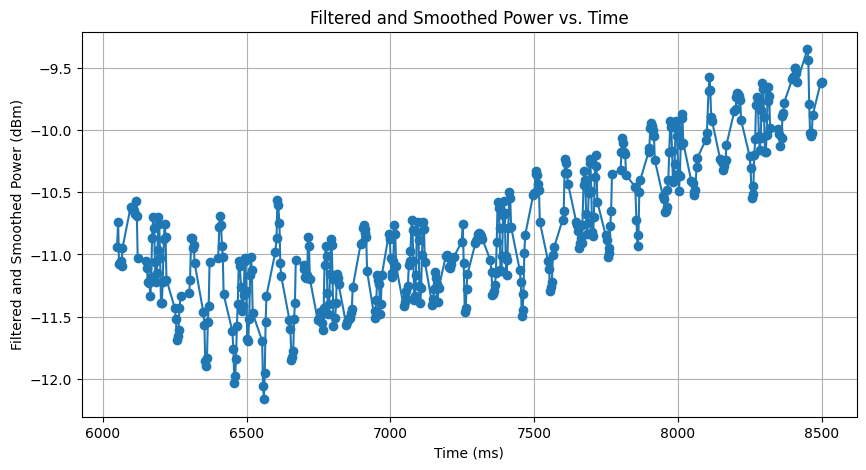

The area under the curve is: 6.19080958395109 dBm * ms


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\KA_FVC.csv")

# Extract the Time and PowerdBm columns
time_ms = df['Time (ms)']
power_dBm = df['PowerdBm (dBm)']

# Define the time range you want to filter
start_time = 6000
end_time = 8500

# Filter the data based on the time range
filtered_time = time_ms[(time_ms >= start_time) & (time_ms <= end_time)]
filtered_power = power_dBm[(time_ms >= start_time) & (time_ms <= end_time)]

# Define the window size for the moving average
window_size = 5

# Apply the moving average filter to the filtered data
smoothed_power = filtered_power.rolling(window=window_size).mean()

# Create the plot for the filtered and smoothed data
plt.figure(figsize=(10, 5))
plt.plot(filtered_time, smoothed_power, marker='o', linestyle='-')
plt.title('Filtered and Smoothed Power vs. Time')
plt.xlabel('Time (ms)')
plt.ylabel('Filtered and Smoothed Power (dBm)')
plt.grid(True)

# Show the plot
plt.show()

print("The area under the curve is:", area, "dBm * ms")


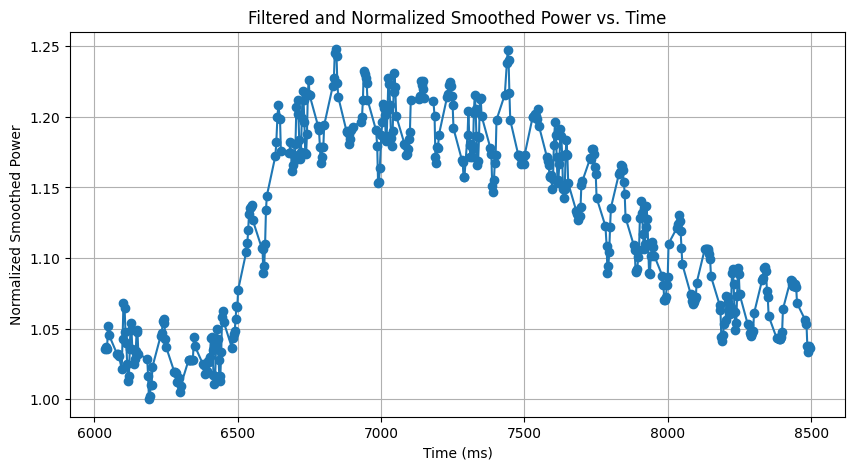

The area under the curve is: 6.19080958395109 normalized units (0 to 1)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\G1_FVC.csv")

# Extract the Time and PowerdBm columns
time_ms = df['Time (ms)']
power_dBm = df['PowerdBm (dBm)']

# Define the time range you want to filter
start_time = 6000
end_time = 8500

# Filter the data based on the time range
filtered_time = time_ms[(time_ms >= start_time) & (time_ms <= end_time)]
filtered_power = power_dBm[(time_ms >= start_time) & (time_ms <= end_time)]

# Define the window size for the moving average
window_size = 5

# Apply the moving average filter to the filtered data
smoothed_power = filtered_power.rolling(window=window_size).mean()

# Normalize the smoothed power values
smoothed_power_normalized = smoothed_power / smoothed_power.max()

# Create the plot for the filtered and smoothed data
plt.figure(figsize=(10, 5))
plt.plot(filtered_time, smoothed_power_normalized, marker='o', linestyle='-')
plt.title('Filtered and Normalized Smoothed Power vs. Time')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Smoothed Power')
plt.grid(True)

# Show the plot
plt.show()

print("The area under the curve is:", area, "normalized units (0 to 1)")


-8.374944363636363


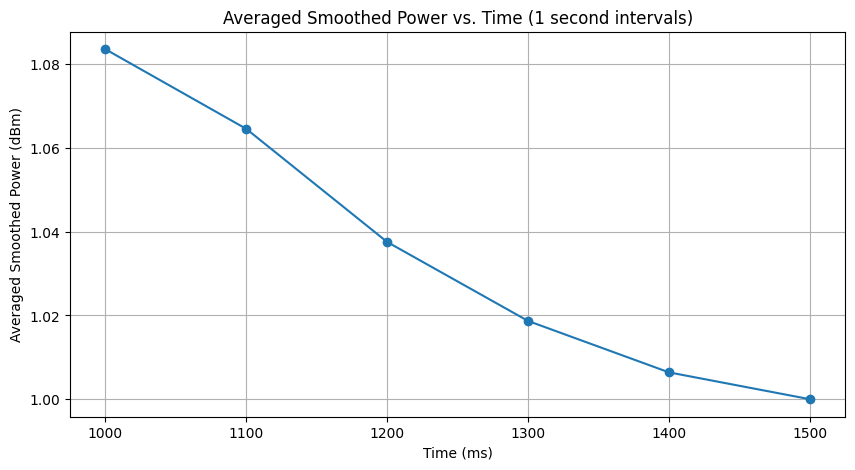

516.7889081278086


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\S1_FVC.csv")

# Extract the Time and PowerdBm columns
time_ms = df['Time (ms)']
power_dBm = df['PowerdBm (dBm)']

# Define the time range you want to filter
start_time = 6000
end_time = 9000

# Filter the data based on the time range
filtered_time = time_ms[(time_ms >= start_time) & (time_ms <= end_time)]
filtered_power = power_dBm[(time_ms >= start_time) & (time_ms <= end_time)]

# Define the window size for the moving average
window_size = 5

# Apply the moving average filter to the filtered data
smoothed_power = filtered_power.rolling(window=window_size).mean()

# Calculate the average of every 1000 samples
average_smoothed_power = smoothed_power.groupby(smoothed_power.index // 100).mean()
print(average_smoothed_power.max())
average_smoothed_power = average_smoothed_power / average_smoothed_power.max()
# Create the plot for the averaged data
plt.figure(figsize=(10, 5))
plt.plot(average_smoothed_power.index * 100, average_smoothed_power, marker='o', linestyle='-')
plt.title('Averaged Smoothed Power vs. Time (1 second intervals)')
plt.xlabel('Time (ms)') 
plt.ylabel('Averaged Smoothed Power (dBm)')
plt.grid(True)

# Show the plot
plt.show()

x_values = average_smoothed_power.index * 100  # Time in ms
y_values = average_smoothed_power.values  # Averaged Smoothed Power (dBm)

# Calculate the width of each trapezoid
total_area = simps(y_values, x=x_values)
print(total_area)


Batch with the highest correlation: 1369    -9.8896
1370    -9.5107
1371    -9.8653
1372   -10.5700
1373   -11.5990
1374   -11.3460
Name: PowerdBm (dBm), dtype: float64
<class 'pandas.core.series.Series'>


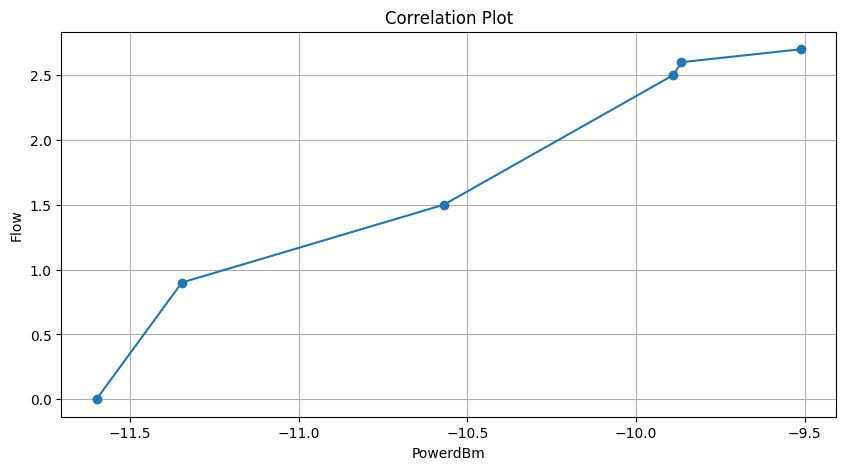

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
df = pd.read_csv(r"C:\New folder (2)\1_2_08_23_DATA\power_meter_11_08_23\KA_FVC.csv")

# Extract the Time and PowerdBm columns
time_ms = df['Time (ms)']
power_dBm = df['PowerdBm (dBm)']

# Define the time range you want to filter
start_time = 6300
end_time = 8500

# Filter the data based on the time range
filtered_time = time_ms[(time_ms >= start_time) & (time_ms <= end_time)]
filtered_power = power_dBm[(time_ms >= start_time) & (time_ms <= end_time)]

# Provided data
data = pd.DataFrame({'Seconds': [ 0.5, 0.75, 1, 1.5, 1.75, 2],
                     'Value': [ 2.7, 2.6, 2.5, 1.5, 0.9, 0]})

# Create a function to calculate correlation
def calculate_correlation(batch, provided_data):
    return np.corrcoef(batch, provided_data['Value'])[0, 1]

highest_correlation = -1  # Initialize with a low value
best_batch = None

# Iterate over batches in the filtered data
batch_size = len(data)
for i in range(len(filtered_power) - batch_size + 1):
    batch = filtered_power[i:i+batch_size]
    
    # Calculate the correlation for this batch
    correlation = calculate_correlation(batch, data)
#     print(highest_correlation)
    # Check if this batch has a higher correlation
    if correlation > highest_correlation:
        highest_correlation = correlation
        best_batch = batch

print("Batch with the highest correlation:", best_batch)
print(type(best_batch))
# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(best_batch.sort_values(ascending = False), data['Value'].sort_values(ascending = False), marker='o', linestyle='-')
plt.title('Correlation Plot')
plt.xlabel('PowerdBm')
plt.ylabel('Flow')
plt.grid(True)
plt.show()
